In [9]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')
    
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) == 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) == 1:
        fig_ax[0].legend(loc=args[1])

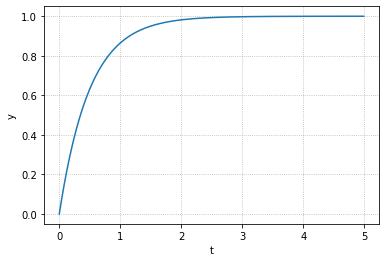

In [5]:
T = 0.5
K = 1.0
P = ct.tf([0, K], [T, 1])
t, y = ct.step_response(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')

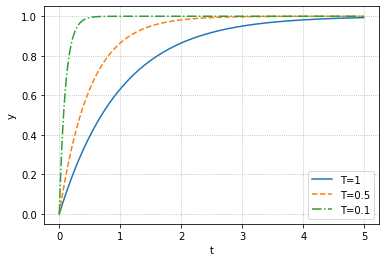

In [11]:
fig, ax = plt.subplots()
LS = linestyle_generator()

K = 1
T = (1, 0.5, 0.1)

for i in range(len(T)):
    t, y = ct.step_response(ct.tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(LS), label='T='+str(T[i]))

plot_set(ax, 't', 'y', 'best')

In [6]:
import sympy as sp
sp.init_printing()
s = sp.Symbol('s')
T = sp.Symbol('T', real=True)
P = 1/((1+T*s)*s)
sp.apart(P, s)

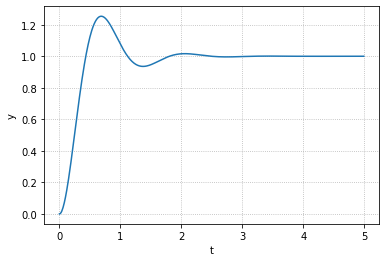

In [11]:
zeta, omega_n = 0.4, 5
P = ct.tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
t, y = ct.step_response(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')

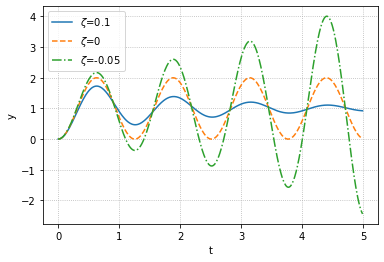

In [15]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = [0.1, 0, -0.05]
omega_n = 5
for i in range(len(zeta)):
    P = ct.tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    t, y = ct.step_response(P, np.arange(0, 5, 0.01))

    pltargs = {'ls': next(LS), 'label': '$\zeta$='+str(zeta[i])}
    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')

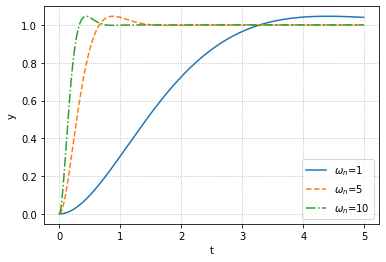

In [16]:
LS = linestyle_generator()
fig, ax = plt.subplots()

zeta = 0.7
omega_n = [1, 5, 10]
for i in range(len(omega_n)):
    P = ct.tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2])
    t, y = ct.step_response(P, np.arange(0, 5, 0.01))

    pltargs = {'ls': next(LS), 'label': '$\omega_n$='+str(omega_n[i])}
    ax.plot(t, y, **pltargs)

plot_set(ax, 't', 'y', 'best')